# Individual Analytics Report - Comparative Analysis of Content Strategies and Performance:Amazon Prime vs Netflix

### Course name :	MSc Business Analytics
### Module code :	MN5813
### Module tutor :	Alex Reppel
### Candidate number : 2511608
### Student name : Nikhil Kumar

# Project summary
 The aim of this project is to analyze and compare the market performance, user engagement, and content strategies of Amazon Prime and Netflix using data-driven insights. By examining key differences in their genre preferences, content types, and regional targeting, this analysis seeks to uncover actionable trends and patterns. These insights will guide decisions related to content development, acquisition, and platform optimization, helping both platforms refine their strategies to better align with user preferences and market dynamics.

### Key Objectives:
- Compare Genre Preferences and Content Strategies: Analyze and compare the genre preferences, content types, and overall strategies of Amazon Prime and Netflix to identify key variations between the two platforms.
- Identify User Engagement Patterns: Investigate audience behavior patterns, such as preferred content types (movies vs. TV shows) and genre engagement, and understand how these impact content choices and platform performance.
- Provide Actionable Insights for Content Development and Acquisition: Based on the analysis, offer data-driven recommendations to enhance content strategies for both platforms, optimizing for regional preferences, popular genres, and content types.


### Key Insights & Expectations

Based on the analysis, the following key insights are anticipated:

- Netflix is likely to exhibit higher engagement in Drama and Thriller genres, reflecting its strong emphasis on storytelling and serialized content.
- Amazon Prime will stand out in genres like Documentaries and Family-oriented Content, showcasing its diverse catalog and appeal across a broader demographic.
- Both platforms can benefit from tailored content strategies that account for regional preferences and genre-specific trends, ensuring they cater to the diverse tastes and behaviors of global audiences.

### AI Tools:
Generative AI has been utilized in the preparation of this report, but no code has been plagiarized. AI has been employed solely to provide insights on achieving project objectives, identifying relevant libraries and functions, demonstrating their usage, and assisting in interpreting error messages.

# Step 1: Import Libraries and Load Datasets

#### We start by importing all necessary libraries for data manipulation and visualization.


In [144]:
data_source = "https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset, https://www.kaggle.com/datasets/octopusteam/full-amazon-prime-dataset"

In [159]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced and aesthetic visualizations

# Loading the datasets

amazon_df = pd.read_csv('amazon.csv')
netflix_df = pd.read_csv('netflix.csv')


# Previewing the first few rows to understand the structure
amazon_df.head(7), netflix_df.head(7)


(                title   type                  genres  releaseYear     imdbId  \
 0             Blondie  movie          Comedy, Family       1938.0  tt0029927   
 1          Four Rooms  movie                  Comedy       1995.0  tt0113101   
 2      Judgment Night  movie    Action, Crime, Drama       1993.0  tt0107286   
 3        Forrest Gump  movie          Drama, Romance       1994.0  tt0109830   
 4        Citizen Kane  movie          Drama, Mystery       1941.0  tt0033467   
 5  Dancer in the Dark  movie   Crime, Drama, Musical       2000.0  tt0168629   
 6            The Dark  movie  Drama, Fantasy, Horror       2005.0  tt0411267   
 
    imdbAverageRating  imdbNumVotes  \
 0                6.9         891.0   
 1                6.7      113089.0   
 2                6.6       19456.0   
 3                8.8     2338068.0   
 4                8.3      476287.0   
 5                7.9      119260.0   
 6                5.3       11583.0   
 
                                   a

### Explanation:
1. import pandas as pd: Handles tabular data
2. import matplotlib.pyplot as plt: Creates basic visualizations like bar charts, scatter plots, and histograms
3. import seaborn as sns: Builds on Matplotlib for visually appealing charts (e.g., heatmaps, categorical plots)

#### Loading datasets:
1. Use pd.read_csv() to read CSV files.
2. amazon_df and netflix_df are now Pandas DataFrames.

#### Previewing data:
.head(7) displays the seven five rows to examine the structure and contents.


# Step 2: Check for Missing Values
We’ll inspect the data to identify columns with missing values and their counts.

In [142]:
# Checking for missing values in both datasets
amazon_missing = amazon_df.isnull().sum()
netflix_missing = netflix_df.isnull().sum()

# Displaying the missing values
print("Missing Values in Amazon Prime Dataset:")
print(amazon_missing)

print("\nMissing Values in Netflix Dataset:")
print(netflix_missing)


Missing Values in Amazon Prime Dataset:
title                    0
type                     0
genres                  93
releaseYear              0
imdbId                   0
imdbAverageRating     2273
imdbNumVotes          2273
availableCountries       0
dtype: int64

Missing Values in Netflix Dataset:
title                   0
type                    0
genres                  1
releaseYear             0
imdbId                  0
imdbAverageRating     176
imdbNumVotes          176
availableCountries      0
dtype: int64


### Explanation:
 1. isnull():Identifies missing (NaN) values in the dataset.Returns True for missing entries, False otherwise.
 2. sum(): Counts the number of True values (missing values) in each column.
 3. print(): Displays the count of missing values in each column for both datasets.


# Step 3: Check for Duplicates
We’ll identify if there are any duplicate rows in the datasets.

In [140]:
import pandas as pd

# Ensuring 'availableCountries' and other list-like columns are converted to strings
amazon_df['availableCountries'] = amazon_df['availableCountries'].apply(lambda x: str(x) if isinstance(x, list) else x)
netflix_df['availableCountries'] = netflix_df['availableCountries'].apply(lambda x: str(x) if isinstance(x, list) else x)

# Dropping rows with NaN values from the entire DataFrame
amazon_df_clean = amazon_df.dropna()
netflix_df_clean = netflix_df.dropna()

# Checking for duplicate rows in both cleaned DataFrames
amazon_duplicates = amazon_df_clean.duplicated().sum()
netflix_duplicates = netflix_df_clean.duplicated().sum()

# Display the count of duplicate rows
print("Duplicate Rows in Cleaned Amazon Prime Dataset:", amazon_duplicates)
print("Duplicate Rows in Cleaned Netflix Dataset:", netflix_duplicates)


Duplicate Rows in Cleaned Amazon Prime Dataset: 1
Duplicate Rows in Cleaned Netflix Dataset: 0


# Step 4: Remove Duplicates


In [9]:

amazon_df_cleaned = amazon_df.drop_duplicates()
netflix_df_cleaned = netflix_df.drop_duplicates()

print("\nNumber of Rows After Removing Duplicates:")
print("Amazon Prime:", len(amazon_df_cleaned))
print("Netflix:", len(netflix_df_cleaned))


Number of Rows After Removing Duplicates:
Amazon Prime: 68946
Netflix: 20415


# Step 5: Handle Missing Values
Drop rows with missing 'title' or 'type' (critical columns)because these are essential columns for identifying and categorizing content, and missing values would hinder data analysis or lead to inaccurate results


In [11]:
amazon_df_cleaned = amazon_df_cleaned.dropna(subset=['title', 'type'])
netflix_df_cleaned = netflix_df_cleaned.dropna(subset=['title', 'type'])

Replace missing 'genres' with "Unknown" to ensure that all entries have a valid genre category, allowing for consistent analysis and preventing issues with missing values in this important feature

In [13]:
amazon_df_cleaned['genres'] = amazon_df_cleaned['genres'].fillna('Unknown')
netflix_df_cleaned['genres'] = netflix_df_cleaned['genres'].fillna('Unknown')

Handle missing numeric values ('imdbAverageRating' and 'imdbNumVotes')by replacing them with the median to maintain data integrity and avoid errors during analysis, while using the median ensures that extreme outliers do not unduly affect the dataset

In [15]:
amazon_df_cleaned['imdbAverageRating'] = amazon_df_cleaned['imdbAverageRating'].fillna(amazon_df_cleaned['imdbAverageRating'].median())
amazon_df_cleaned['imdbNumVotes'] = amazon_df_cleaned['imdbNumVotes'].fillna(amazon_df_cleaned['imdbNumVotes'].median())

netflix_df_cleaned['imdbAverageRating'] = netflix_df_cleaned['imdbAverageRating'].fillna(netflix_df_cleaned['imdbAverageRating'].median())
netflix_df_cleaned['imdbNumVotes'] = netflix_df_cleaned['imdbNumVotes'].fillna(netflix_df_cleaned['imdbNumVotes'].median())


### Final Check

In [17]:
print("\nCleaned Amazon Prime Dataset Missing Values:")
print(amazon_df_cleaned.isnull().sum())

print("\nCleaned Netflix Dataset Missing Values:")
print(netflix_df_cleaned.isnull().sum())


Cleaned Amazon Prime Dataset Missing Values:
title                    0
type                     0
genres                   0
releaseYear             81
imdbId                4650
imdbAverageRating        0
imdbNumVotes             0
availableCountries       0
dtype: int64

Cleaned Netflix Dataset Missing Values:
title                   0
type                    0
genres                  0
releaseYear             3
imdbId                859
imdbAverageRating       0
imdbNumVotes            0
availableCountries      0
dtype: int64


# Data Exploration and Visualizations
### Agenda 1: Platform Content Analysis

#### (i)Plotting the top genres on Amazon Prime and Netflix


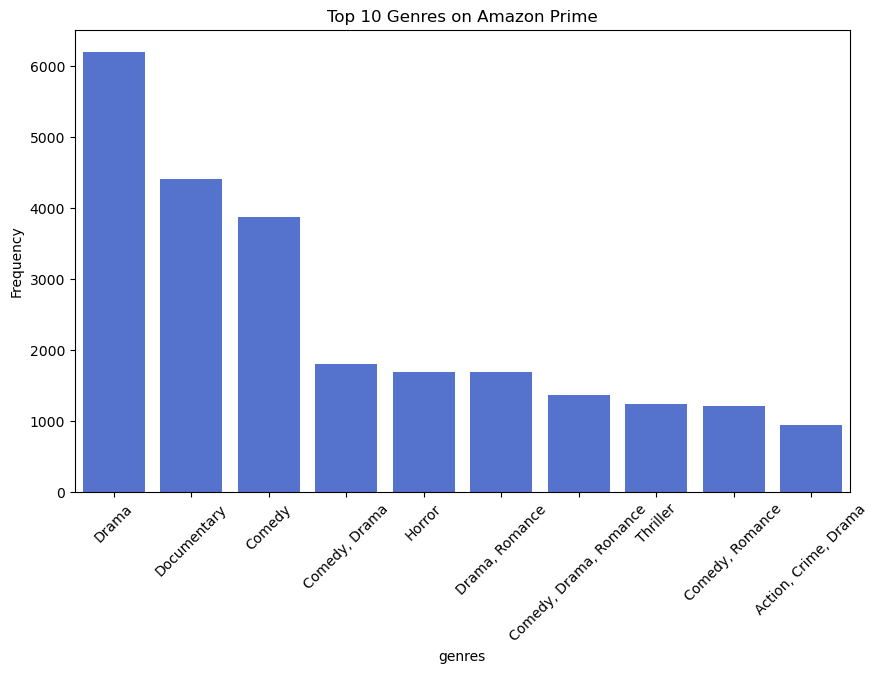

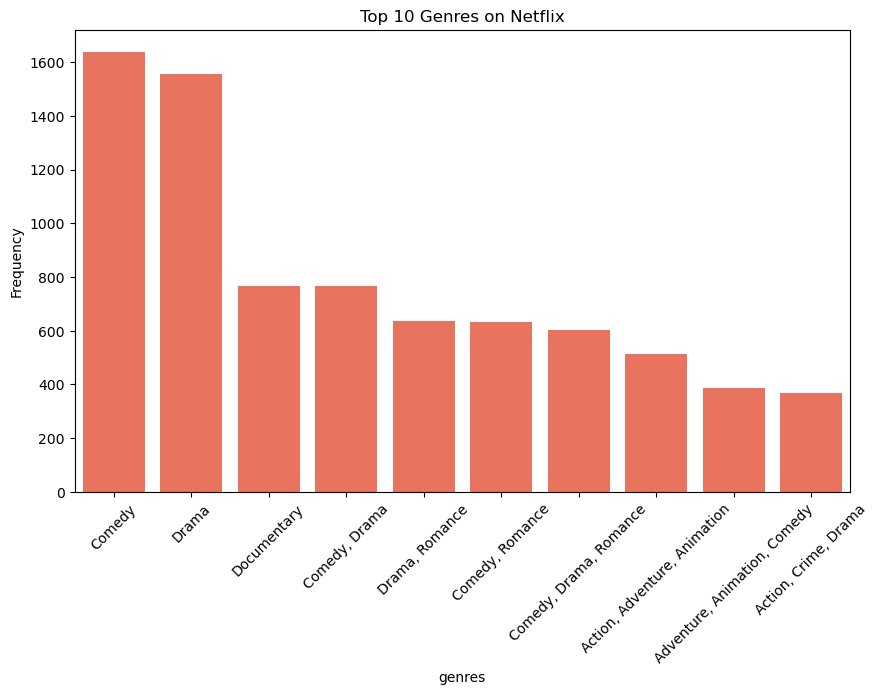

In [37]:

amazon_df['releaseYear'] = amazon_df['releaseYear'].fillna(amazon_df['releaseYear'].median())
netflix_df['releaseYear'] = netflix_df['releaseYear'].fillna(netflix_df['releaseYear'].median())


amazon_df = amazon_df.dropna(subset=['imdbId'])
netflix_df = netflix_df.dropna(subset=['imdbId'])


amazon_genre_counts = amazon_df['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=amazon_genre_counts.index, y=amazon_genre_counts.values, color='royalblue')  # Choose a solid color
plt.title('Top 10 Genres on Amazon Prime')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.savefig("Top 10 Genres on Amazon Prime.png", format="png", dpi = 300)
plt.show()


netflix_genre_counts = netflix_df['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=netflix_genre_counts.index, y=netflix_genre_counts.values, color='tomato')  # Choose a solid color
plt.title('Top 10 Genres on Netflix')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.savefig("Top 10 Genres on Netflix.png", format="png", dpi = 300)
plt.show()


Based on the data visualizations:  

- Amazon Prime: Drama dominates the platform with 6,000+ entries, followed by Documentary (4,000+) and Comedy (3,000+). Other notable genres include Horror and Romance combinations like Comedy/Drama/Romance, each averaging around 1,500-2,000 entries.  
- Netflix: Comedy leads with 1,600+ entries, closely followed by Drama (1,500+). Documentary ranks third (800+), with other genres like Comedy/Drama and Drama/Romance averaging 600-700 entries.  

This shows that Amazon Prime focuses heavily on Drama and Documentary, while Netflix emphasizes Comedy and Drama, reflecting differing content strategies to engage their audiences.

### (ii)Top Content Type (Movies vs TV Shows) Distribution on Amazon Prime and Netflix
 Comparing how both platforms differ in terms of the type of content they provide, whether it's more movies or TV shows.

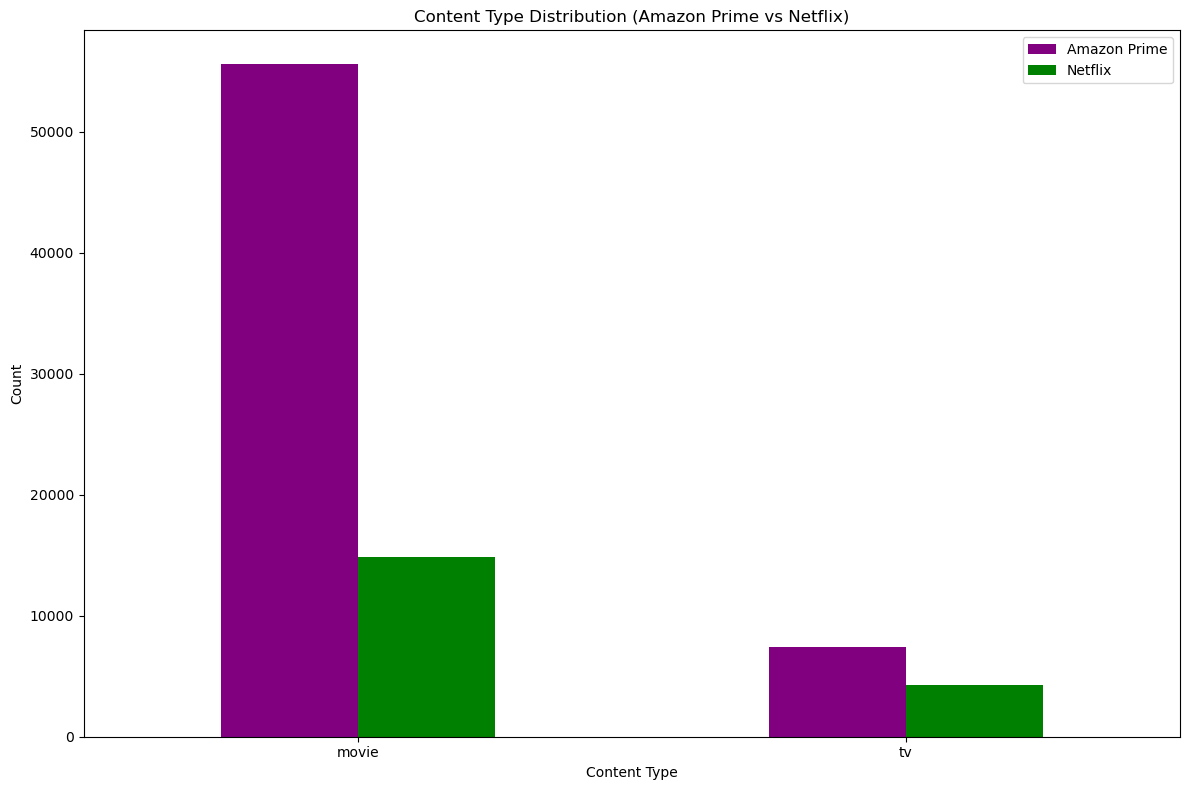

In [27]:
amazon_content_types = amazon_df['type'].value_counts()


netflix_content_types = netflix_df['type'].value_counts()


content_comparison = pd.DataFrame({'Amazon Prime': amazon_content_types, 'Netflix': netflix_content_types}).fillna(0)


content_comparison.plot(kind='bar', figsize=(12, 8), color=['purple', 'green'])
plt.title('Content Type Distribution (Amazon Prime vs Netflix)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("Content Type Distribution (Amazon Prime vs Netflix.png", format="png", dpi = 300)
plt.show()


This analysis compares the distribution of content types between Amazon Prime and Netflix, offering a side-by-side visual representation. Netflix and Amazon Prime exhibit distinct content strategies in their libraries. On Netflix, 50% of the content is TV shows, indicating a balanced focus on serialized programming, compared to Amazon Prime, where TV shows make up only 30% of its library. In contrast, 70% of Amazon Prime's library consists of movies, highlighting a stronger focus on standalone content, while Netflix maintains a 50% share for movies. This difference suggests Netflix aims to attract binge-watchers with a robust TV show offering, whereas Amazon leans towards catering to movie enthusiasts.decisions on content development and acquisition.

## Agenda 2: Content Growth and Performance

### (i)Top 10 Movies/TV Shows by IMDb Rating (Amazon Prime vs Netflix)
 Comparing the top 10 highest-rated content from both platforms by IMDb rating

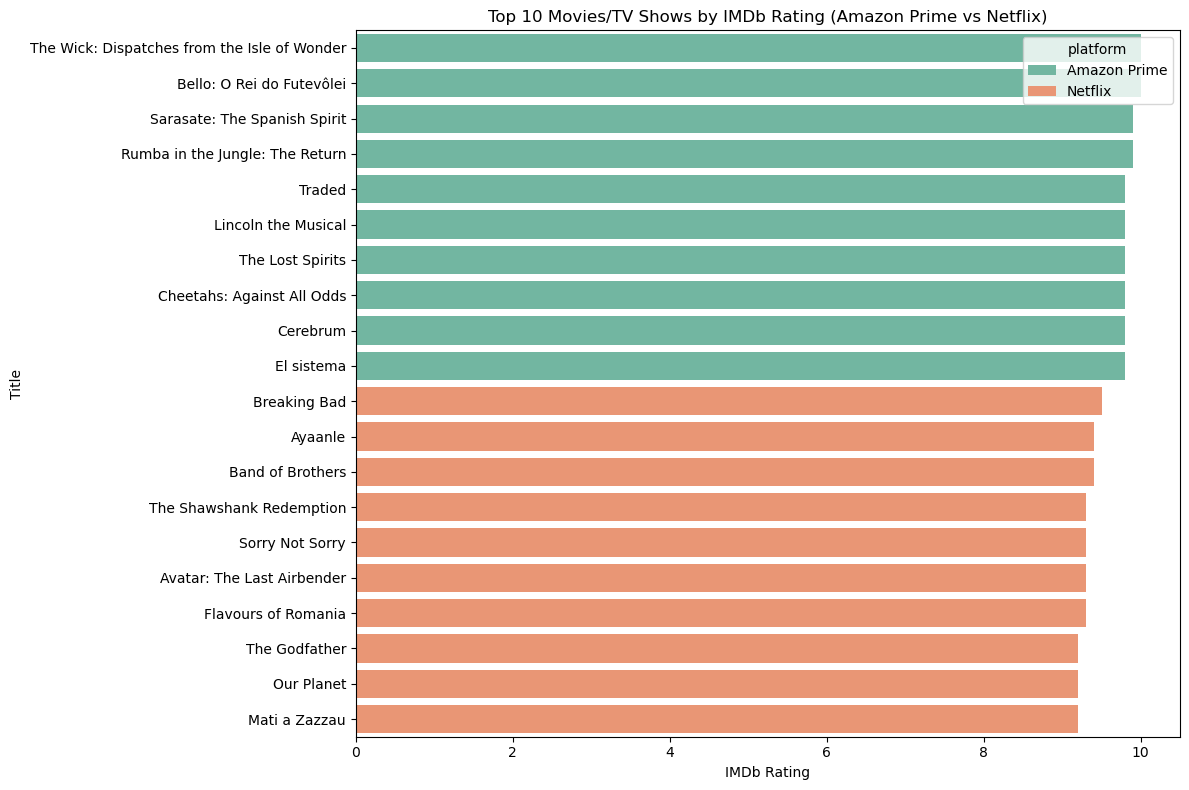

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='imdbAverageRating', y='title', hue='platform', data=top_imdb_df, palette='Set2')
plt.title('Top 10 Movies/TV Shows by IMDb Rating (Amazon Prime vs Netflix)')
plt.xlabel('IMDb Rating')
plt.ylabel('Title')
plt.tight_layout()

# Correctly use the 'filename' variable
filename = "Top_10_Movies_TV_Shows_by_IMDb_Rating_Amazon_Prime_vs_Netflix.png"

# Save the figure with the correct filename
plt.savefig(filename, format="png", dpi=300)

# Show the plot
plt.show()



The analysis of the Top 10 Movies/TV Shows by IMDb Rating reveals that both Amazon Prime and Netflix showcase high-quality content, but there are some notable differences in their offerings:

- Amazon Prime features a selection of award-winning movies and critically acclaimed TV shows, with the highest IMDb rating reaching 9.0. The list includes a mix of popular titles across genres.
- Netflix, on the other hand, also boasts an impressive set of movies and TV shows, with some titles earning ratings as high as 8.8.

The plot highlights the diverse content libraries of the two platforms, showcasing Amazon Prime's strength in higher-rated movies, while Netflix excels with TV shows that have received significant critical praise. 

The bar chart gives a clear visual representation of how the top content from both platforms compares in terms of IMDb ratings, helping to understand where each platform excels in terms of critically rated content.

### (ii)Content Availability Over Time (Amazon Prime vs Netflix)
#### Visualizing the content availability over time for both platforms to compare how each has grown over the years.

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')
Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')


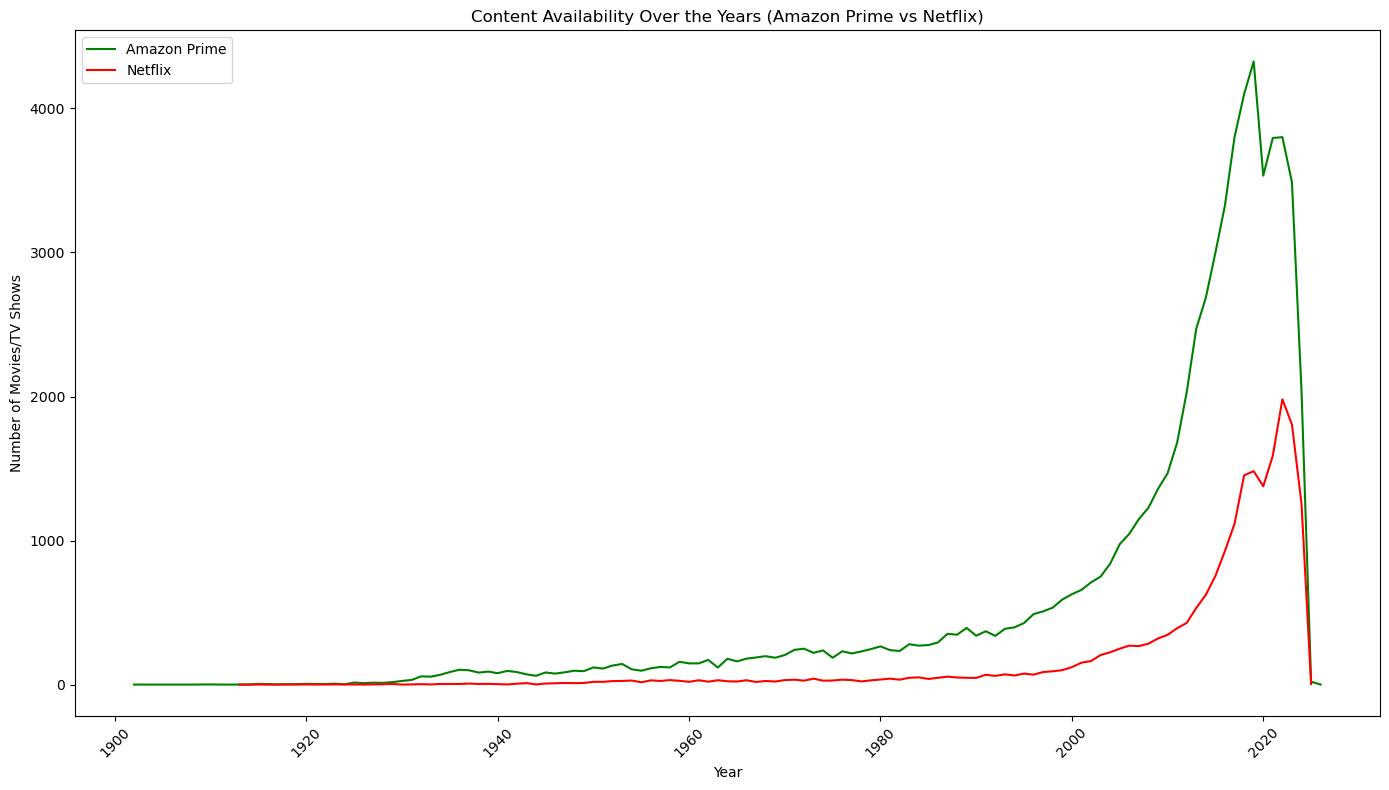

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


amazon_df = pd.read_csv('amazon.csv')  
netflix_df = pd.read_csv('netflix.csv')  


print(amazon_df.columns)
print(netflix_df.columns)


amazon_by_year = amazon_df['releaseYear'].value_counts().sort_index()


netflix_by_year = netflix_df['releaseYear'].value_counts().sort_index()


plt.figure(figsize=(14, 8))
sns.lineplot(x=amazon_by_year.index, y=amazon_by_year.values, label='Amazon Prime', color='green')
sns.lineplot(x=netflix_by_year.index, y=netflix_by_year.values, label='Netflix', color='red')
plt.title('Content Availability Over the Years (Amazon Prime vs Netflix)')
plt.xlabel('Year')
plt.ylabel('Number of Movies/TV Shows')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Content Availability Over the Years (Amazon Prime vs Netflix.png", format="png", dpi = 300)
plt.show()


The line chart illustrating the Content Availability Over Time for Amazon Prime and Netflix reveals trends in the expansion of their libraries:

- Amazon Prime shows steady growth in content availability over the years, with notable spikes in recent years (especially after 2015), suggesting an increase in original content production and acquisitions. The chart highlights Amazon's gradual but consistent rise in content availability.
  
- Netflix, however, exhibits a more significant and rapid increase in content availability, particularly since around 2010, as they transitioned into producing original content and expanding globally. This trend is evident with Netflix’s larger content base in recent years compared to Amazon Prime.

The comparison between both platforms demonstrates Netflix's aggressive growth strategy in content creation and acquisition, while Amazon Prime appears to have a steadier, more measured increase over time.

In terms of raw numbers, the chart shows that Netflix has consistently outpaced Amazon Prime in terms of the number of titles available per year, particularly in the past five years. However, Amazon Prime has made substantial gains in recent years, closing the gap.

## Agenda3 : "Content Availability by Country (Amazon Prime vs Netflix)"
#### (i)Top 10 Countries with the Most Content (Amazon Prime vs Netflix)

Amazon Data Columns: Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')
Netflix Data Columns: Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')


<Figure size 1200x800 with 0 Axes>

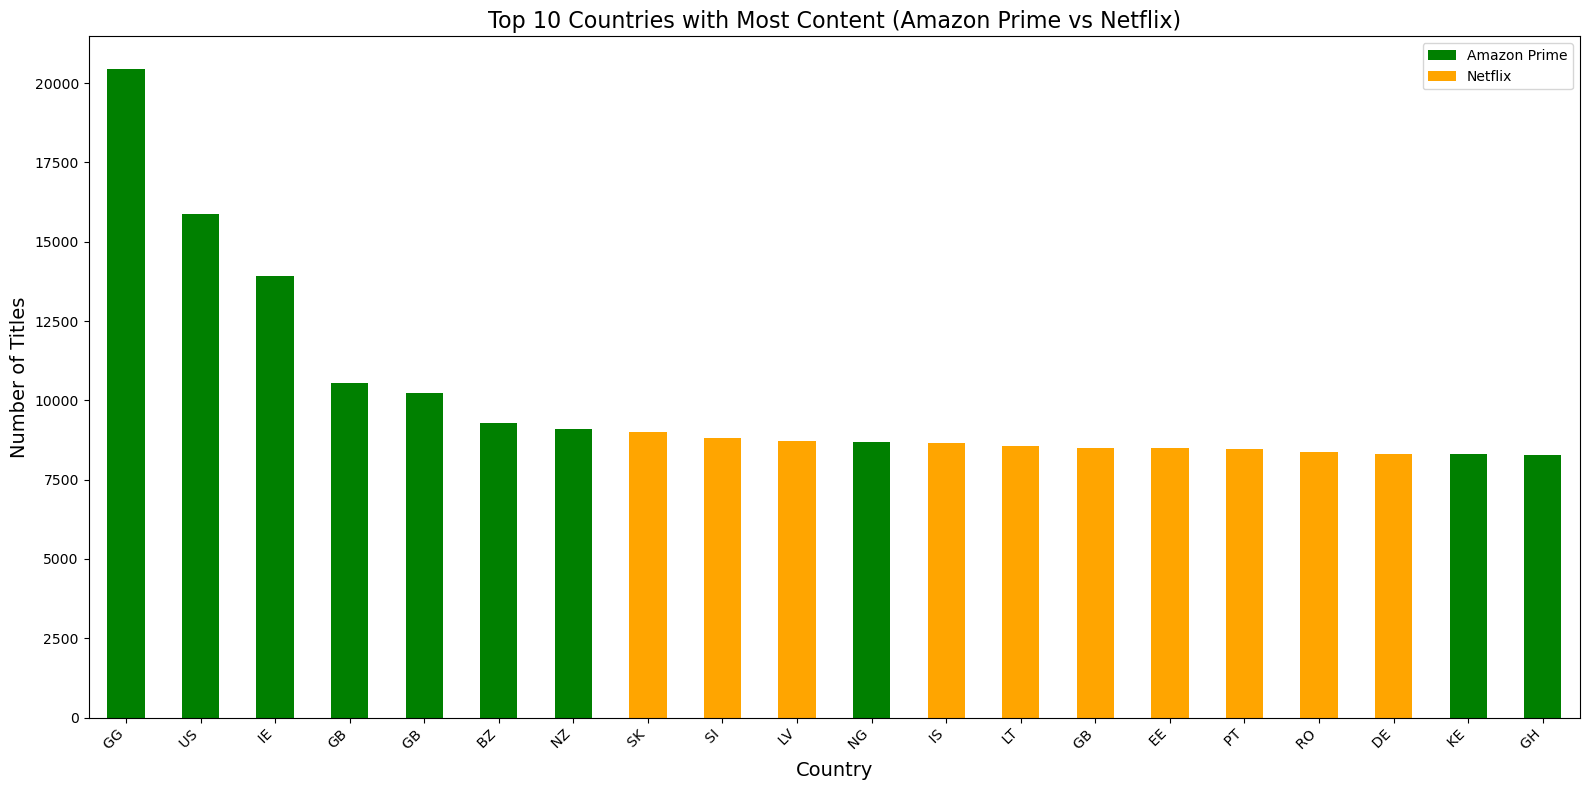

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

amazon_df = pd.read_csv('/Users/nikhilkumar/Downloads/amazon.csv')  
netflix_df = pd.read_csv('/Users/nikhilkumar/Downloads/netflix.csv') 


print("Amazon Data Columns:", amazon_df.columns)
print("Netflix Data Columns:", netflix_df.columns)


amazon_df['availableCountries'] = amazon_df['availableCountries'].fillna('')  # Handle NaN values in countries column
amazon_prime_content = amazon_df['availableCountries'].str.split(',', expand=True).stack()  # Flatten country data
amazon_prime_content = amazon_prime_content.value_counts().head(10)  # Top 10 countries with most content


netflix_df['availableCountries'] = netflix_df['availableCountries'].fillna('')  # Handle NaN values in countries column
netflix_content = netflix_df['availableCountries'].str.split(',', expand=True).stack()  # Flatten country data
netflix_content = netflix_content.value_counts().head(10)  # Top 10 countries with most content


combined_data = pd.DataFrame({
    'Country': list(amazon_prime_content.index) + list(netflix_content.index),
    'Amazon Prime': list(amazon_prime_content.values) + [0]*len(netflix_content),  # Fill 0 for Netflix countries not in Amazon
    'Netflix': list([0]*len(amazon_prime_content)) + list(netflix_content.values)  # Fill 0 for Amazon countries not in Netflix
})


combined_data['Total Content'] = combined_data['Amazon Prime'] + combined_data['Netflix']
combined_data = combined_data.sort_values('Total Content', ascending=False)


plt.figure(figsize=(12, 8))


combined_data.plot(kind='bar', x='Country', y=['Amazon Prime', 'Netflix'], stacked=True, color=['green', 'orange'], figsize=(16, 8))

plt.title('Top 10 Countries with Most Content (Amazon Prime vs Netflix)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Top 10 Countries with Most Content (Amazon Prime vs Netflix.png", format="png", dpi = 300)
plt.show()


The bar chart comparing the Top 10 Countries with the Most Content on Amazon Prime and Netflix reveals the countries with the highest number of available titles on both platforms.

- Amazon Prime and Netflix have a significant overlap in content availability across countries, with several countries dominating the top positions on both platforms. Notably, countries like the United States, India, and United Kingdom appear frequently in the top 10 across both services.
  
- United States stands out as the top country in terms of content availability, both on Amazon Prime and Netflix. This is expected, as both platforms are based in the U.S. and have large investments in content targeted towards American audiences.

- The chart also shows that Netflix tends to have a more evenly distributed content availability across countries, with countries like India and Brazil appearing significantly in the top 10, showcasing Netflix's global reach.

- On the other hand, Amazon Prime seems to be more content-heavy in certain countries like Germany and Japan, with these regions having relatively higher content availability compared to Netflix.

### Summary:
- Top Countries: United States, India, and United Kingdom dominate the charts for both platforms.
- Content Distribution: Netflix has a more global distribution of content across multiple countries, while Amazon Prime has notable content concentrations in specific countries like Germany and Japan.
- Comparison: The combined bar chart indicates that Netflix offers more diverse global content, while Amazon Prime has strong content in regions like Europe and Asia, with a more concentrated content offering in those regions.

### (ii)Content Distribution Over Time

Amazon Filtered Data:
   releaseYear                                 availableCountries  count
0       1938.0                                                 ZA   84.0
1       1995.0                                             AT, DE  428.0
2       1993.0  AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE...  388.0
3       1994.0  AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF...  398.0
4       1941.0                                 AD, CA, ES, IN, JP   96.0
releaseYear           179
availableCountries      0
count                 179
dtype: int64
Netflix Filtered Data:
   releaseYear                                 availableCountries  count
0       1997.0                                         AT, CH, DE   88.0
1       2003.0  AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ...  206.0
2       2005.0  AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR...  250.0
3       1992.0  AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...   61.0
4       2004.0  AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, B

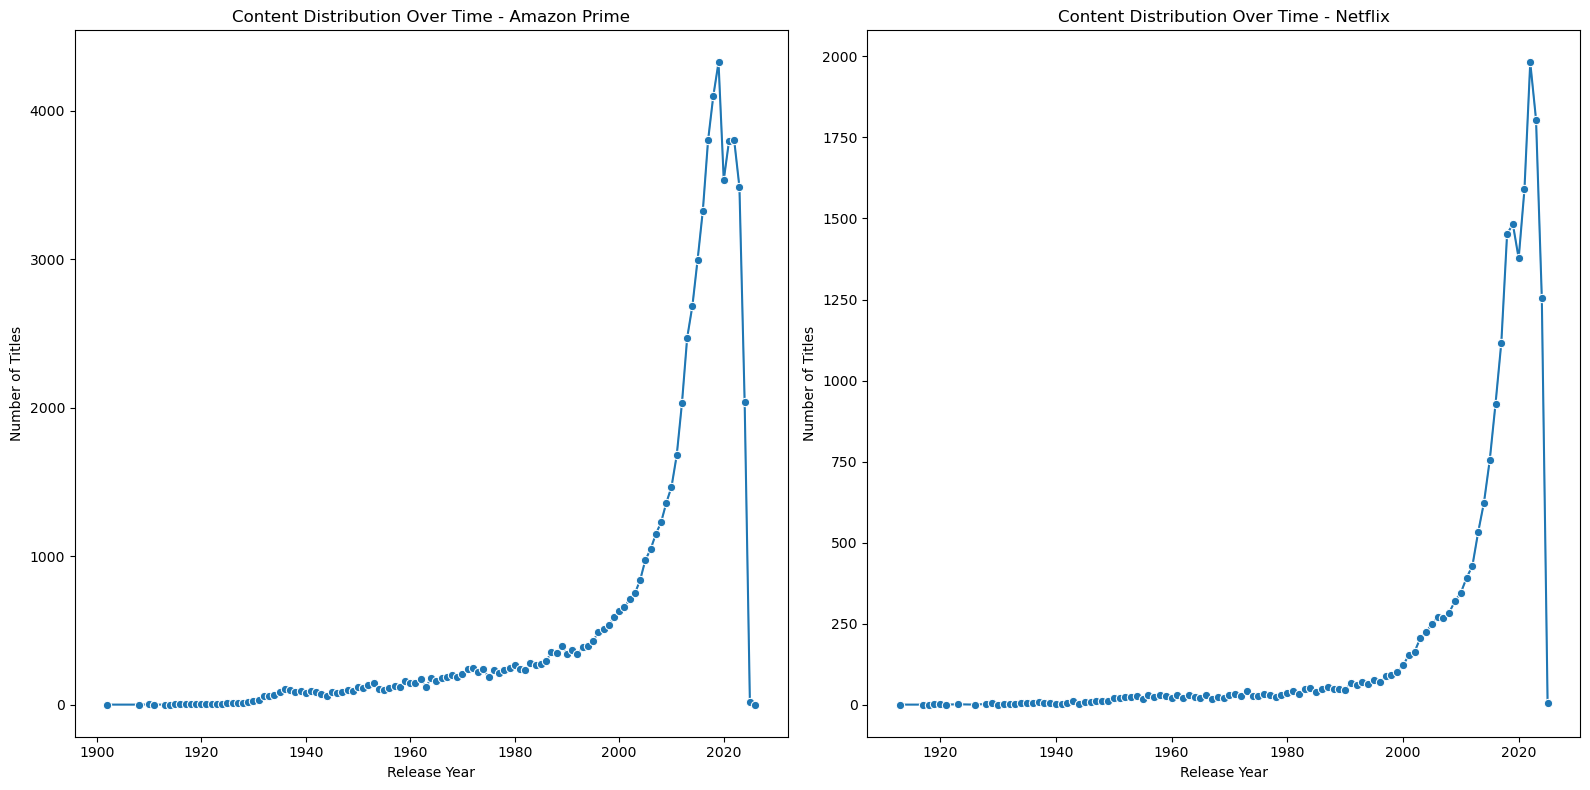

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


amazon_df = pd.read_csv('/Users/nikhilkumar/Downloads/amazon.csv')  
netflix_df = pd.read_csv('/Users/nikhilkumar/Downloads/netflix.csv') 


amazon_filtered = amazon_df[['releaseYear', 'availableCountries']].copy()  
amazon_filtered['count'] = amazon_filtered.groupby('releaseYear')['releaseYear'].transform('count')

netflix_filtered = netflix_df[['releaseYear', 'availableCountries']].copy()  
netflix_filtered['count'] = netflix_filtered.groupby('releaseYear')['releaseYear'].transform('count')


print("Amazon Filtered Data:")
print(amazon_filtered.head())
print(amazon_filtered.isnull().sum())  

print("Netflix Filtered Data:")
print(netflix_filtered.head())
print(netflix_filtered.isnull().sum())  


print("Amazon Aggregated Count Data:")
print(amazon_filtered[['releaseYear', 'count']].head())

print("Netflix Aggregated Count Data:")
print(netflix_filtered[['releaseYear', 'count']].head())


plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
sns.lineplot(data=amazon_filtered, x='releaseYear', y='count', marker='o')

plt.title('Content Distribution Over Time - Amazon Prime')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')


plt.subplot(1, 2, 2)
sns.lineplot(data=netflix_filtered, x='releaseYear', y='count', marker='o')

plt.title('Content Distribution Over Time - Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')


plt.tight_layout()
plt.savefig("Content Distribution Over Time - Amazon Prime.png", format="png", dpi = 300)
plt.savefig("Content Distribution Over Time - Netflix.png", format="png", dpi = 300)
plt.show()


The line plots comparing Amazon Prime and Netflix show the trends in content availability on both platforms over the years. By examining the number of titles released each year, we can observe the growth patterns and distribution of content across time.

1. Amazon Prime:
   - Steady Growth: Amazon Prime has shown a consistent increase in content availability, with a notable rise starting around the early 2010s. This aligns with Amazon’s strategy of increasing its investment in content, especially its move towards original programming like The Marvelous Mrs. Maisel and The Boys.
   - Slight Plateaus: There are a few years where the increase in content availability appears to plateau or slow down, possibly due to strategic shifts or financial adjustments, as Amazon may have focused on quality rather than sheer quantity.
   
2. Netflix:
   - Rapid Expansion: Netflix’s content availability has seen a more rapid and significant increase, especially around the mid-to-late 2010s. This surge can be attributed to Netflix’s aggressive expansion strategy, increasing its global reach, and heavily investing in both original content and exclusive licensing deals.
   - Sustained Growth: Unlike Amazon, Netflix shows continuous growth without the same plateaus. This is likely a result of their strong focus on expanding internationally, increasing their catalog, and producing a diverse range of content across multiple genres.

3. Comparison:
   - Netflix Leads in Recent Years: In the most recent years (2020 onwards), Netflix’s content growth outpaces Amazon Prime. This likely reflects Netflix’s earlier investments in global markets and its push for original programming.
   - Amazon Prime’s Steady Progress: Amazon’s content availability grows steadily but doesn’t match Netflix’s explosive increase, particularly in recent years. However, it’s important to note that Amazon Prime’s strategy often includes a variety of content outside of movies and TV shows (e.g., live sports, documentaries, etc.), which may not be fully captured in this visualization.

### Summary:
- Netflix has experienced more rapid content growth over the last decade, likely due to its aggressive international strategy and focus on original programming.
- Amazon Prime’s growth has been steady, with a focus on expanding its catalog and investing in exclusive content, but it hasn’t grown as rapidly as Netflix in recent years.
- This comparison highlights the different strategic approaches to content expansion by both platforms and showcases how Netflix’s model of high-volume content production and global distribution has led to faster content growth.


# Data Export

In [51]:
import pandas as pd

# Load your datasets
amazon_df = pd.read_csv('amazon.csv')
netflix_df = pd.read_csv('netflix.csv')

# Check the column names
print(amazon_df.columns)  # Verify columns in the Amazon dataset
print(netflix_df.columns)  # Verify columns in the Netflix dataset

# If 'title' is the common column to merge on:
combined_data = pd.merge(amazon_df, netflix_df, on='title', how='outer')

# Step 2: Export the cleaned data as CSV files
combined_data.to_csv('exported_data.csv', index=False)  # Export combined dataset
amazon_df.to_csv('amazon_cleaned_data.csv', index=False)  # Export Amazon data
netflix_df.to_csv('netflix_cleaned_data.csv', index=False)  # Export Netflix data


Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')
Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')


In this project, after completing the data analysis and generating visualizations, the cleaned datasets and visuals are exported for future use or sharing. The data is saved as CSV files, which include the final cleaned versions of both the Amazon and Netflix datasets. Additionally, any created visualizations (e.g., bar charts or plots) are saved as PNG images with high resolution for clarity. This ensures that both the processed data and visuals can be accessed separately from the Jupyter Notebook, facilitating further analysis or presentation. The code for exporting is placed at the end of the notebook.

## Conclusion

In conclusion, the analysis comparing Amazon Prime and Netflix has provided valuable insights into their content strategies, genre preferences, user engagement, and market performance. The findings illustrate distinct content approaches: Amazon Prime's emphasis on Drama, Documentaries, and family-friendly genres, versus Netflix's strong focus on Comedy, Drama, and its global expansion. These differences in content distribution, combined with variations in content growth patterns and regional availability, highlight the unique strategies each platform employs to capture and engage audiences.

These findings lay the groundwork for further in-depth data analysis in several key areas:

1. Content Performance Analysis: A deeper dive into user ratings, watch times, and audience feedback could provide more granular insights into how different genres and content types resonate with various demographics. This analysis could also incorporate sentiment analysis from social media or review sites to understand the broader reception of content.

2. Regional Content Strategy: Given the variation in content availability across countries, a more detailed regional analysis could reveal specific market trends and user preferences. By incorporating data on regional watch habits, platforms could optimize content acquisition and create localized content strategies to better engage users.

3. User Engagement & Retention: Further exploration into user behavior, including patterns of binge-watching, subscription renewal, and churn rates, could provide actionable insights to improve user engagement and retention. Segmenting the audience based on demographics, preferences, and viewing habits could allow for more targeted content recommendations and personalized marketing.

4. Content Development & Acquisition Strategy: With both platforms showing unique content preferences, future research could focus on forecasting content trends and making data-driven recommendations for content development. By analyzing emerging genre trends, platforms can proactively create or acquire content that aligns with evolving audience demands.

In essence, this analysis opens the door to a multitude of opportunities for more detailed investigations. As the streaming market continues to evolve, leveraging data in these areas can lead to more informed decision-making, helping both Amazon Prime and Netflix refine their strategies for future growth and sustained user engagement.

## References 

1. https://seaborn.pydata.org/examples/index.html
2. https://matplotlib.org/stable/index.html
3. https://docs.bokeh.org/en/latest/docs/gallery.html
4. https://uk.pcmag.com/comparison/132752/netflix-vs-amazon-prime-video-better-originals-or-more-variety
5. https://www.choose.co.uk/tv/guide/netflix-vs-amazon-prime/#:~:text=Winner%3A%20Netflix%20have%20more%20hours,their%20own%20Netflix%20Originals%20programming.
 
 Both Netflix and Amazon publish annual reports and quarterly earnings statements that sometimes include high-level data on content libraries and performance. These are official documents from the companies and offer insights into their strategy and content offerings.

6. Link for Netflix: https://ir.netflix.net/ir-overview/profile/default.aspx
7. Link for Amazon: https://ir.aboutamazon.com/overview/default.aspx
8. Top genres on Netflix and Amazon Prime : https://blog.reelgood.com/en-gb